In [1]:
from pymodulon.core import IcaData
from pymodulon.visualization import *
from pymodulon.io import load_json_model, save_to_json
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 200)

# Load IcaData object

In [4]:
ica_data = load_json_model('../data/precise2/precise2.json.gz')

# Annotate iModulons

In [4]:
iM_to_annotate = ica_data.imodulon_names[216]
iM_to_annotate

'Glutathione'

## Plot Gene Weights

<AxesSubplot:xlabel='Gene Start', ylabel='216 Gene Weight'>

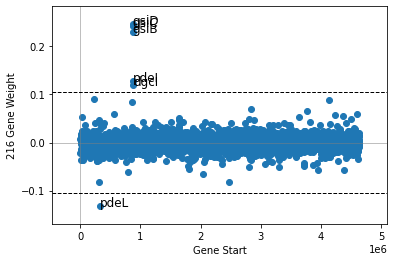

In [699]:
plot_gene_weights(ica_data,iM_to_annotate, adjust_labels=False)

## Compute Regulator Enrichment

In [700]:
reg_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=2, force=True)
reg_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs


## Plot Regulator Histogram

<AxesSubplot:xlabel='194 Gene Weight', ylabel='Number of Genes'>

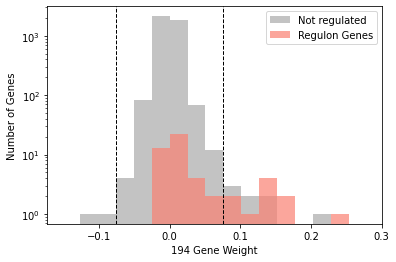

In [651]:
plot_regulon_histogram(ica_data, iM_to_annotate, reg_enrichment.loc[0, 'regulator'])

## Show Genes

In [701]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,length
b0832,0.245805,gsiD,NaN,871890,872801,+,glutathione ABC transporter membrane subunit GsiD,Amino acid transport and metabolism,P75799,arcA,911
b0831,0.242843,gsiC,NaN,870967,871887,+,glutathione ABC transporter membrane subunit GsiC,Amino acid transport and metabolism,P75798,arcA,920
b0830,0.230745,gsiB,NaN,869411,870949,+,glutathione ABC transporter periplasmic bindin...,Amino acid transport and metabolism,P75797,arcA,1538
b0833,0.128653,pdeI,NaN,872979,875327,+,putative c-di-GMP phosphodiesterase PdeI,Signal transduction mechanisms,P75800,NaN,2348
b0834,0.120272,dgcI,NaN,875335,876663,+,putative diguanylate cyclase DgcI,Signal transduction mechanisms,P75801,NaN,1328
b0315,-0.131578,pdeL,NaN,332371,333459,+,DNA-binding transcriptional activator/c-di-GMP...,Transcription,P21514,"Sigma70,argR,cra,pdeL",1088


## Plot iModulon Activities

<AxesSubplot:ylabel='216 iModulon\nActivity'>

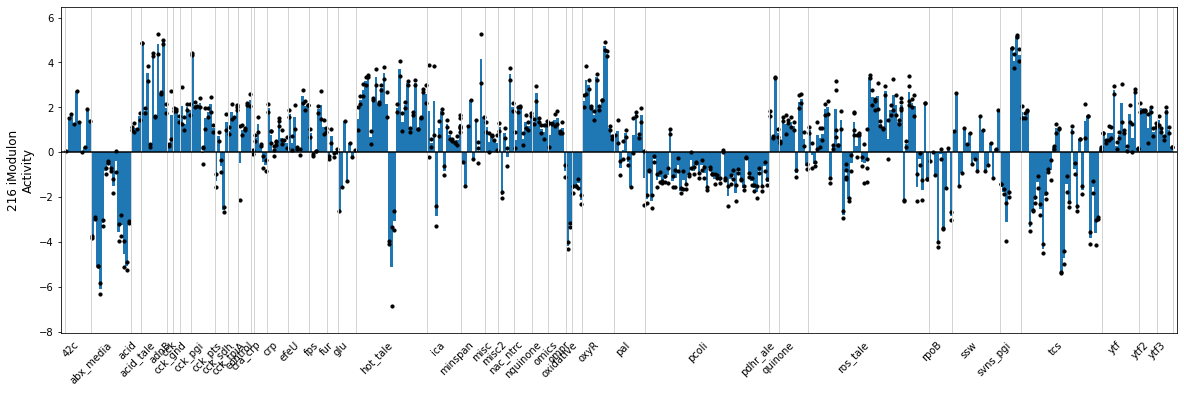

In [702]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

<AxesSubplot:ylabel='215 iModulon\nActivity'>

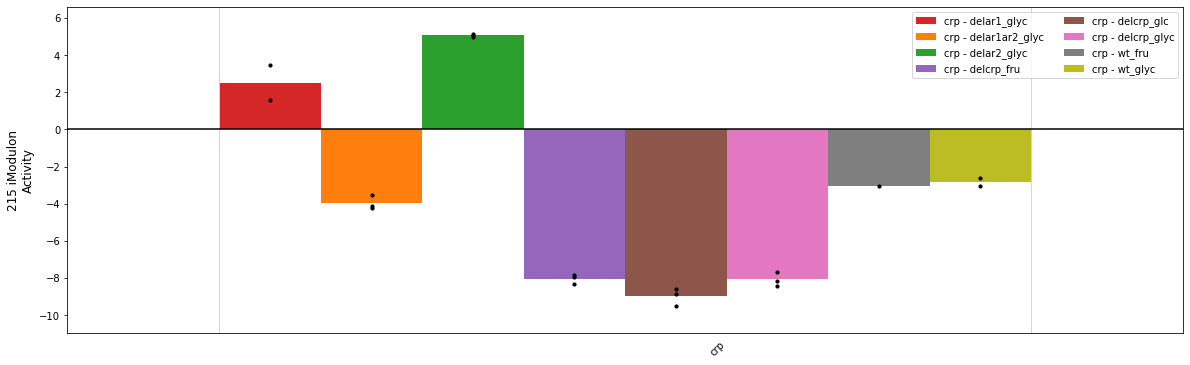

In [697]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='crp', ax=ax)

In [176]:
pd.set_option('display.max_rows', 200) 

In [185]:
ica_data.sample_table.columns

Index(['sample_id', 'study', 'project', 'condition', 'rep_id', 'contact',
       'creator', 'run_date', 'Strain Description', 'Strain', 'Base Media',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH',
       'Antibiotic for selection', 'Culture Type', 'Growth Rate (1/hr)',
       'Evolved Sample', 'Isolate Type', 'Sequencing Machine',
       'Additional Details', 'Biological Replicates', 'R1', 'R2', 'BAM',
       'alignment', 'DOI', 'GEO', 'Published', 'SRX', 'Run', 'Notes',
       'LibraryLayout', 'Platform', 'passed_fastqc', 'passed_pct_reads_mapped',
       'passed_reads_mapped_to_CDS', 'passed_global_correlation', 'full_name',
       'passed_similar_replicates', 'passed_number_replicates'],
      dtype='object')

In [573]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['misc2'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH'
]]

,sample_id,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH
ecoli_00285,misc2__arg_cytd__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00286,misc2__arg_cytd__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,cytidine (1mM) + arginine (5mM),37,7.0
ecoli_00281,misc2__dbcn_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00282,misc2__dbcn_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,dibucaine,37,7.0
ecoli_00832,misc2__dellon_glc__1,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00833,misc2__dellon_glc__2,MG1655,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00287,misc2__delyheO_pyr__1,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00288,misc2__delyheO_pyr__2,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,sauer trace element mixture,None,37,7.0
ecoli_00279,misc2__salc_glc__1,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0
ecoli_00280,misc2__salc_glc__2,MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,salicylate,37,7.0


## Add iModulon Table to IcaData

In [29]:
imod_table = pd.read_csv('../data/precise2/imodulon_table.csv', index_col=0)
imod_table.head()

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,note
e14-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SG_yzfA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
SG_ytiD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
membrane?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seems membrane-related
CysB-1,cysB,3.770000e-28,1.940000e-23,0.5,0.516129,0.507937,16.0,32.0,31.0,1.0,NaN,NaN


In [30]:
ica_data.rename_imodulons(dict(zip(ica_data.imodulon_names, list(imod_table.index))))

In [31]:
ica_data.imodulon_table = imod_table

In [32]:
save_to_json(ica_data, '../data/precise2/precise2.json', compress=True)